## US Permanent Visa Wage Prediction CMPE 255 Fall 2018
Lu Tang,Niraj Dharamshi,Tarang Dhulkotia

Permanent Visas are issued by Department of Homeland Security's US Citizenship and Immigration Services for immigration of labour where shortage of skills and lack of ability is experienced.Department of labour allows employers to hire foreign workers(Alien) to work permanently in US under the understanding that american workers will not face adverse effect in wages & working conditions. 
Our aim is to predict wages of the visa applicant considering their education,country of origin,current wage in the industry etc.We frame this problem as Regression as our first approach  & Classification problem as our second approach.We have applied multiple algorithms and have compared their results using multiple evaluation metrics in the end.
As salary in a way is a direct indicator of in-demand industrties to make career in, such models may help US lawmakers to understand and design policies so that new generations could get better & relevant skills which are currently imported from outside.Also this models could be employed by employers to understand long term cost accrual of human resource for the field they are in. 

In [79]:
#importing all the relevant for data pre processing,visualisation,feature generation & selection,model training & dimensionality reduction libraries
import pandas as pd
import seaborn as sns
!pip install missingno
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import scipy.sparse as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt

## Data Collection & Inspection

In [3]:
#reading three separate dataset files in pandas dataframe
df2015=pd.read_csv('/content/gdrive/Team Drives/255-Project/2015.csv')
df2016=pd.read_csv('/content/gdrive/Team Drives/255-Project/2016.csv')
df2017=pd.read_csv('/content/gdrive/Team Drives/255-Project/2017.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Printing total number of rows and columns in each dataframe
print('Total Number of Records in 2015 dataset are '+str(df2015.shape[0]))
print('Total Number of Columns in 2015 dataset are '+str(df2015.shape[1]))
print('Total Number of Records in 2016 dataset are '+str(df2016.shape[0]))
print('Total Number of Columns in 2016 dataset are '+str(df2016.shape[1]))
print('Total Number of Records in 2017 dataset are '+str(df2017.shape[0]))
print('Total Number of Columns in 2017 dataset are '+str(df2017.shape[1]))


Total Number of Records in 2015 dataset are 88994
Total Number of Columns in 2015 dataset are 126
Total Number of Records in 2016 dataset are 126143
Total Number of Columns in 2016 dataset are 126
Total Number of Records in 2017 dataset are 97603
Total Number of Columns in 2017 dataset are 125


In [5]:
#checking column name differences between 2015 & 2016 dataset
df2015.columns.difference(df2016.columns)

Index(['foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country',
       'foreign_worker_info_education_other',
       'foreign_worker_info_postal_code', 'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience',
       'foreign_worker_info_training_comp',
       'foreign_worker_ownership_interest',
       'foreign_worker_yr_rel_edu_completed',
       'ji_foreign_worker_live_on_premises',
       'ji_offered_to_sec_j_foreign_worker', 'naics_code', 'naics_title',
       'pw_job_title_9089', 'rec_info_barg_rep_notified',
       'recr_info_pro_org_advert_from', 'recr_info_pro_org_advert_to'],
      dtype='object')

In [6]:
#checking column name differences between 2016 & 2015 dataset
df2016.columns.difference(df2015.columns)

Index(['fw_info_alt_edu_experience', 'fw_info_birth_country',
       'fw_info_education_other', 'fw_info_postal_code',
       'fw_info_rel_occup_exp', 'fw_info_req_experience',
       'fw_info_training_comp', 'fw_info_yr_rel_edu_completed',
       'fw_ownership_interest', 'ji_fw_live_on_premises',
       'ji_offered_to_sec_j_fw', 'naics_us_code', 'naics_us_title',
       'pw_job_title_908', 'recr_info_barg_rep_notified',
       'recr_info_prof_org_advert_from', 'recr_info_prof_org_advert_to'],
      dtype='object')

In [7]:
#checking column name differences between 2015 & 2017 dataset
df2015.columns.difference(df2017.columns)

Index(['foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country',
       'foreign_worker_info_education_other',
       'foreign_worker_info_postal_code', 'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience',
       'foreign_worker_info_training_comp',
       'foreign_worker_ownership_interest',
       'foreign_worker_yr_rel_edu_completed',
       'ji_foreign_worker_live_on_premises',
       'ji_offered_to_sec_j_foreign_worker', 'naics_code', 'naics_title',
       'rec_info_barg_rep_notified', 'serialid'],
      dtype='object')

In [8]:
#checking column name differences between 2017 & 2015 dataset
df2017.columns.difference(df2015.columns)

Index(['fw_info_alt_edu_experience', 'fw_info_birth_country',
       'fw_info_education_other', 'fw_info_postal_code',
       'fw_info_rel_occup_exp', 'fw_info_req_experience',
       'fw_info_training_comp', 'fw_info_yr_rel_edu_completed',
       'fw_ownership_interest', 'ji_fw_live_on_premises',
       'ji_offered_to_sec_j_fw', 'naics_us_code', 'naics_us_title',
       'recr_info_barg_rep_notified'],
      dtype='object')

In [9]:
#checking column name differences between 2016 & 2017 dataset
df2016.columns.difference(df2017.columns)

Index(['pw_job_title_908', 'recr_info_prof_org_advert_from',
       'recr_info_prof_org_advert_to', 'serialid'],
      dtype='object')

In [10]:
#checking column name differences between 2017 & 2016 dataset
df2017.columns.difference(df2016.columns)

Index(['pw_job_title_9089', 'recr_info_pro_org_advert_from',
       'recr_info_pro_org_advert_to'],
      dtype='object')

In [0]:
#Making column labels uniform accross all the samples in all three years
df2015.rename(columns={
'foreign_worker_info_alt_edu_experience':'fw_info_alt_edu_experience',
'foreign_worker_info_birth_country':'fw_info_birth_country',
'foreign_worker_info_education_other':'fw_info_education_other',
'foreign_worker_info_postal_code':'fw_info_postal_code',
'foreign_worker_info_rel_occup_exp':'fw_info_rel_occup_exp',
'foreign_worker_info_req_experience':'fw_info_req_experience',
'foreign_worker_info_training_comp':'fw_info_training_comp',
'foreign_worker_ownership_interest':'fw_ownership_interest',
'foreign_worker_yr_rel_edu_completed':'fw_info_yr_rel_edu_completed',
'ji_foreign_worker_live_on_premises':'ji_fw_live_on_premises',
'ji_offered_to_sec_j_foreign_worker':'ji_offered_to_sec_j_fw',
'naics_code':'naics_us_code',
'naics_title':'naics_us_title',
'rec_info_barg_rep_notified':'recr_info_barg_rep_notified',
'recr_info_pro_org_advert_from':'recr_info_prof_org_advert_from',
'recr_info_pro_org_advert_to':'recr_info_prof_org_advert_to'
}, inplace=True)


df2016.rename(columns={'pw_job_title_908':'pw_job_title_9089'}, inplace=True)


df2017.rename(columns={
'recr_info_pro_org_advert_from':'recr_info_prof_org_advert_from',
'recr_info_pro_org_advert_to':'recr_info_prof_org_advert_to'
}, inplace=True)

df2015.drop(['serialid'], axis=1, inplace=True)
df2016.drop(['serialid'], axis=1, inplace=True)

In [0]:
#Making State information uniform across all the samples
mycols = ['employer_state', 'agent_state', 'job_info_work_state', 'foreign_worker_info_state']

for cols in mycols:
  df2015[cols] = df2015[cols].map(
  {
      'ALABAMA': 'AL',
      'ALASKA': 'AK',
      'ARIZONA': 'AZ',
      'ARKANSAS': 'AR',
      'CALIFORNIA': 'CA',
      'COLORADO': 'CO',
      'CONNECTICUT': 'CT',
      'DELAWARE': 'DE',
      'FLORIDA': 'FL',
      'GEORGIA': 'GA',
      'HAWAII': 'HI',
      'IDAHO': 'ID',
      'ILLINOIS': 'IL',
      'INDIANA': 'IN',
      'IOWA': 'IA',
      'KANSAS': 'KS',
      'KENTUCKY': 'KY',
      'LOUISIANA': 'LA',
      'MAINE': 'ME',
      'MARYLAND': 'MD',
      'MASSACHUSETTES': 'MA',
      'MICHIGAN': 'MI',
      'MINNESOTA': 'MN',
      'MISSISSIPPI': 'MS',
      'MISSOURI': 'MO',
      'MONTANA': 'MT',
      'NEBRASKA': 'NE',
      'NEVADA': 'NV',
      'NEW HAMPSHIRE': 'NH',
      'NEW JERSEY': 'NJ',
      'NEW MEXICO': 'NM',
      'NEW YORK': 'NY',
      'NORTH CAROLINA': 'NC',
      'NORTH DAKOTA': 'ND',
      'OHIO': 'OH',
      'OKLAHOMA': 'OK',
      'OREGON': 'OR',
      'PENNSYLVANIA': 'PA',
      'RHODE ISLAND': 'RI',
      'SOUTH CAROLINA': 'SC',
      'SOUTH DAKOTA': 'SD',
      'TENNESSEE': 'TN',
      'TEXAS': 'TX',
      'UTAH': 'UT',
      'VERMONT': 'VT',
      'VIRGINIA': 'VA',
      'WASHINGTON': 'WA',
      'WEST VIRGINIA': 'WV',
      'WISCONSIN': 'WI',
      'WYOMING': 'WY',
  }
  )

In [0]:
#Creating a seperate 'year' column to distinguish a sample after merging all the data
df2015['year']=2015
df2016['year']=2016
df2017['year']=2017

In [0]:
#Combining data of all three years
final = pd.concat([df2015, df2016, df2017], ignore_index=True)

## Data Cleaning

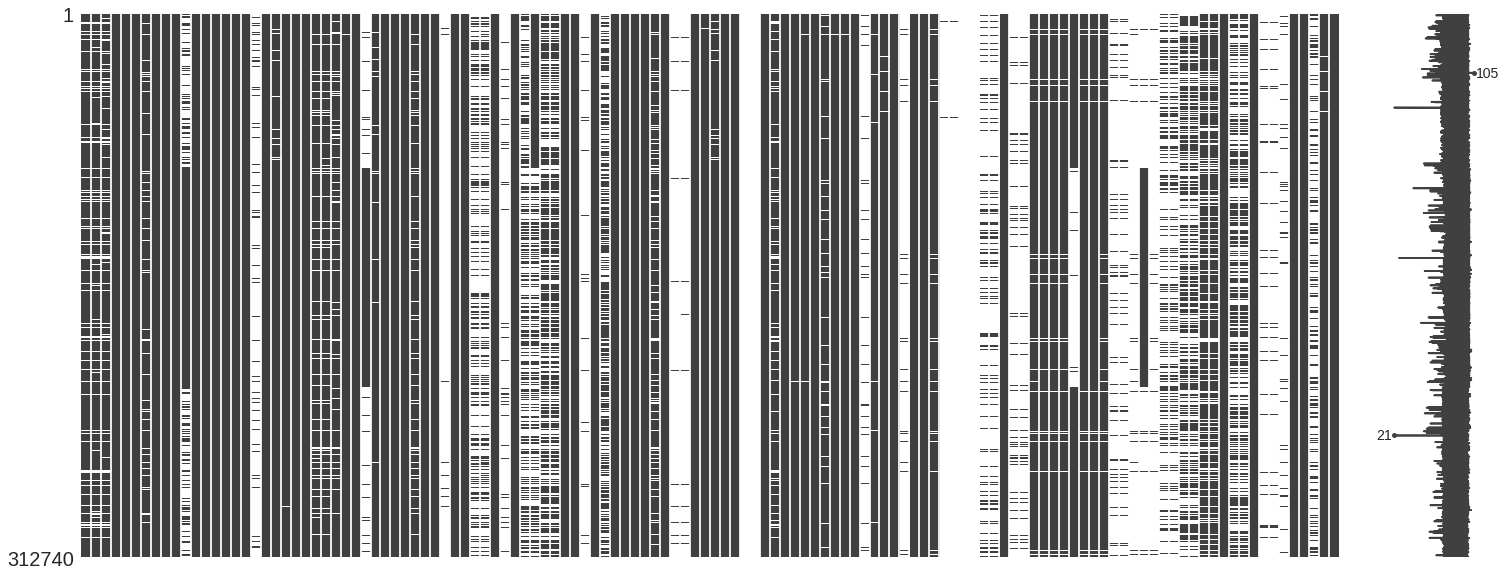

In [15]:
#visualising null values in datset;white indicates null value and vertical strips indicate columns
msno.matrix(final)

In [0]:
#Removing all the features having fill-rate of less than 2%
null_rate = 1 - final.count()/len(final.index)
b=list(zip(null_rate.index, null_rate))

empty=[]
for i in range(len(b)):
  if(b[i][1]>0.02):
    empty.append(b[i])    

ans = []
for i in range(len(empty)):
  ans.append(empty[i][0])
  

final = final.drop(columns=ans)


#Removing all the rows which have null values in one or more columns
final = final.dropna()

## Data Exploration

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer State')]

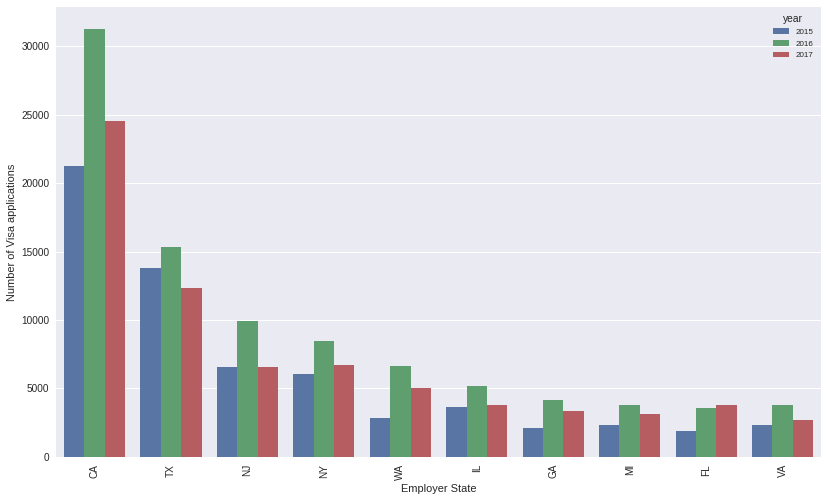

In [17]:
# Visualising number of applications per state over the years
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_state',hue='year', data=final, order=final.employer_state.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer State', ylabel='Number of Visa applications')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Employer name')]

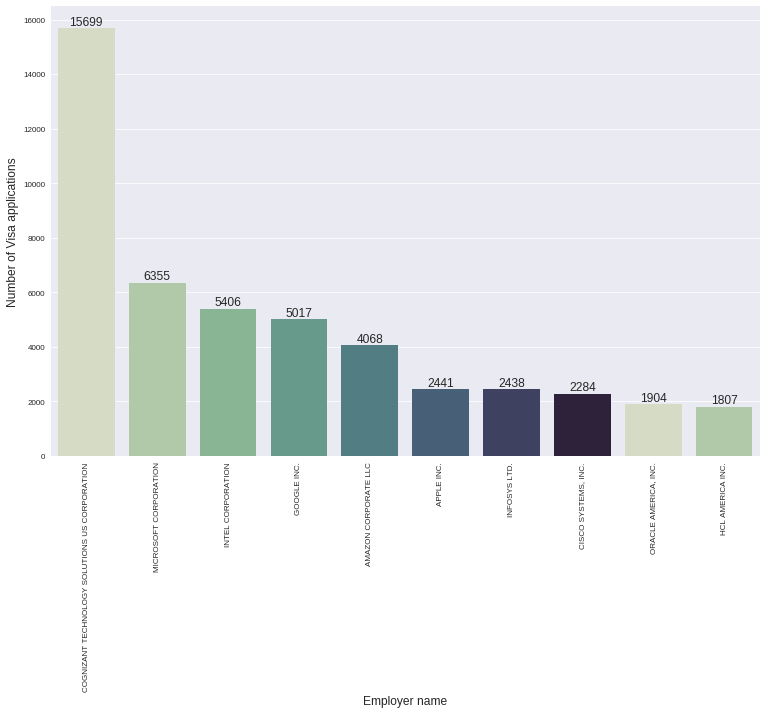

In [18]:
#Visualising number of application by Employers
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=final, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=final.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "employer_name" column and displaying counts above bars 
for i, v in final.employer_name.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')
    
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

In [19]:
#Finding number of applicants respective to the job title.
#Converting values to lower case
final['job_info_job_title'] = final['job_info_job_title'].str.lower()

#Splitting job titles by '-'
final['job_info_job_title'] = final['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
final['job_info_job_title'] = final['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
final['job_info_job_title'] = final['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
final['job_info_job_title'] = final['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
final['job_info_job_title'] = final['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
final['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


final['job_info_job_title'].value_counts(dropna=True)[:10]

software engineer                25166
computer systems analyst         16401
senior software engineer          7489
software developer                5934
programmer analyst                4962
software development engineer     4025
systems analyst                   3183
poultry processing worker         2406
senior programmer analyst         2307
business analyst                  1990
Name: job_info_job_title, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Job Title')]

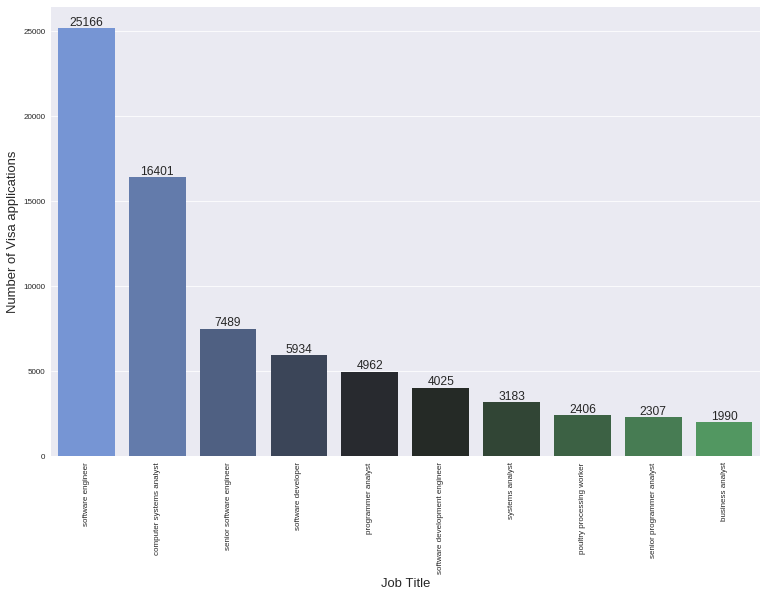

In [20]:
#Visualising number of application by Job titles
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=final, 
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
               order=final.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in final.job_info_job_title.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.job_info_job_title,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Number of Visa applications'), Text(0.5,0,'Education level')]

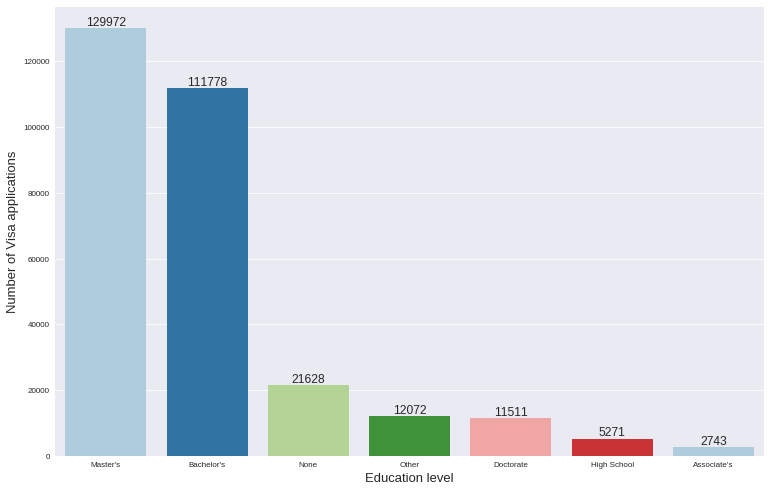

In [21]:
#Visualising number of applications by education of applicants
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='foreign_worker_info_education',data=final, 
               palette = sns.color_palette("Paired"), 
               order=final.foreign_worker_info_education.value_counts().iloc[:10].index)

#Iterating over elements in "job_info_job_title" column and displaying counts above bars 
for i, v in final.foreign_worker_info_education.value_counts().head(10).reset_index().iterrows():
    ax.text(i,v.foreign_worker_info_education,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

#Setting label titles    
ax.set(xlabel='Education level', ylabel='Number of Visa applications')


## Data Pre-Processing

In [0]:
#Removing all the rows containing non-digit values in wage_offer_from_9089
final = final[~(final['wage_offer_from_9089'].str.contains('\d')==False)]   

In [0]:
#Making pw_amount_9089 uniform accross all the rows
final['pw_amount_9089'] = final['pw_amount_9089'].astype(str)
final['pw_amount_9089'] = final['pw_amount_9089'].str.replace(",","") 

for unit in final.pw_unit_of_pay_9089.unique():
    if unit == "Hour":
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = final['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = final['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "Week":
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = final['pw_amount_9089'].apply(lambda x: float(x) * 50)
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = final['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Month":
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = final['pw_amount_9089'].apply(lambda x: float(x) * 12)
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = final['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Bi-Weekly":  
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = final['pw_amount_9089'].apply(lambda x: float(x) * 25)
        final.loc[final['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = final['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue

final['pw_amount_9089'] = final['pw_amount_9089'].astype(float)

In [0]:
#Making wage_offer_from_9089 uniform accross all the rows
final['wage_offer_from_9089'] = final['wage_offer_from_9089'].astype(str)
final['wage_offer_from_9089'] = final['wage_offer_from_9089'].str.replace(",","") 

for unit in final.wage_offer_unit_of_pay_9089.unique():
    if unit == "Hour":
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_from_9089'] = final['wage_offer_from_9089'].apply(lambda x: float(x) * 8 * 250)
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_unit_of_pay_9089'] = final['wage_offer_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "Week":
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_from_9089'] = final['wage_offer_from_9089'].apply(lambda x: float(x) * 50)
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_unit_of_pay_9089'] = final['wage_offer_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Month":
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_from_9089'] = final['wage_offer_from_9089'].apply(lambda x: float(x) * 12)
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_unit_of_pay_9089'] = final['wage_offer_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Bi-Weekly":  
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_from_9089'] = final['wage_offer_from_9089'].apply(lambda x: float(x) * 25)
        final.loc[final['wage_offer_unit_of_pay_9089'] == unit, 'wage_offer_unit_of_pay_9089'] = final['wage_offer_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
final['wage_offer_from_9089'] = final['wage_offer_from_9089'].astype(float)

In [25]:
#Dividing our continuous income values into some categories to facilitate their visualization
final['remuneration'] = pd.cut(final['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = final['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        20123
30-60k       34300
60-90k      102282
90-120k      97633
120-150k     30135
150-180k      6340
180-210k      3406
210-240k       699
240-270k        34
270k+           20
Name: remuneration, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


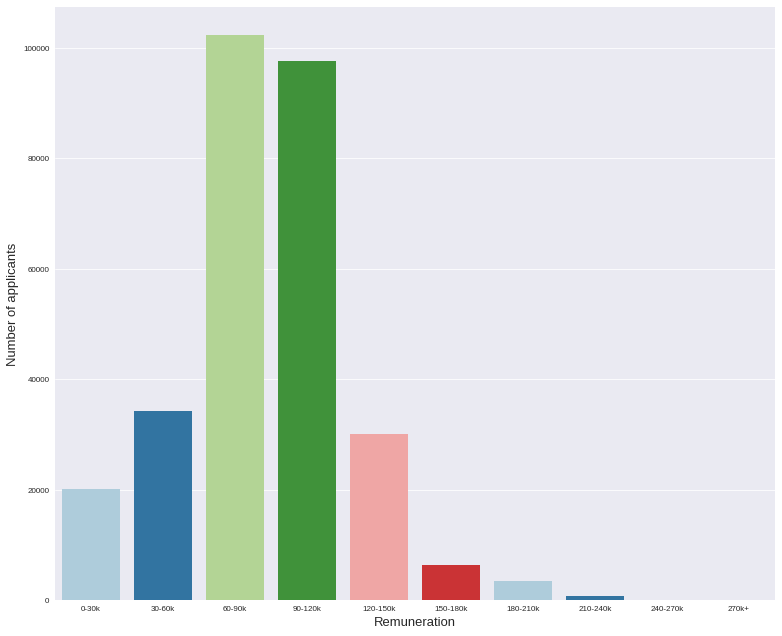

In [26]:
#Plot to show the distribution of remunerations
g = sns.factorplot(x='remuneration', data=final, kind="count",
                   palette=sns.color_palette("Paired"), size=9, aspect=1.2)

g.set(xlabel='Remuneration', ylabel='Number of applicants')

## Feature Extraction

In [0]:
# Computing Correlations between features
del final['remuneration']
cat = final
cat = cat.astype(str)
catnew = cat.apply(LabelEncoder().fit_transform)
corr = catnew.corr()

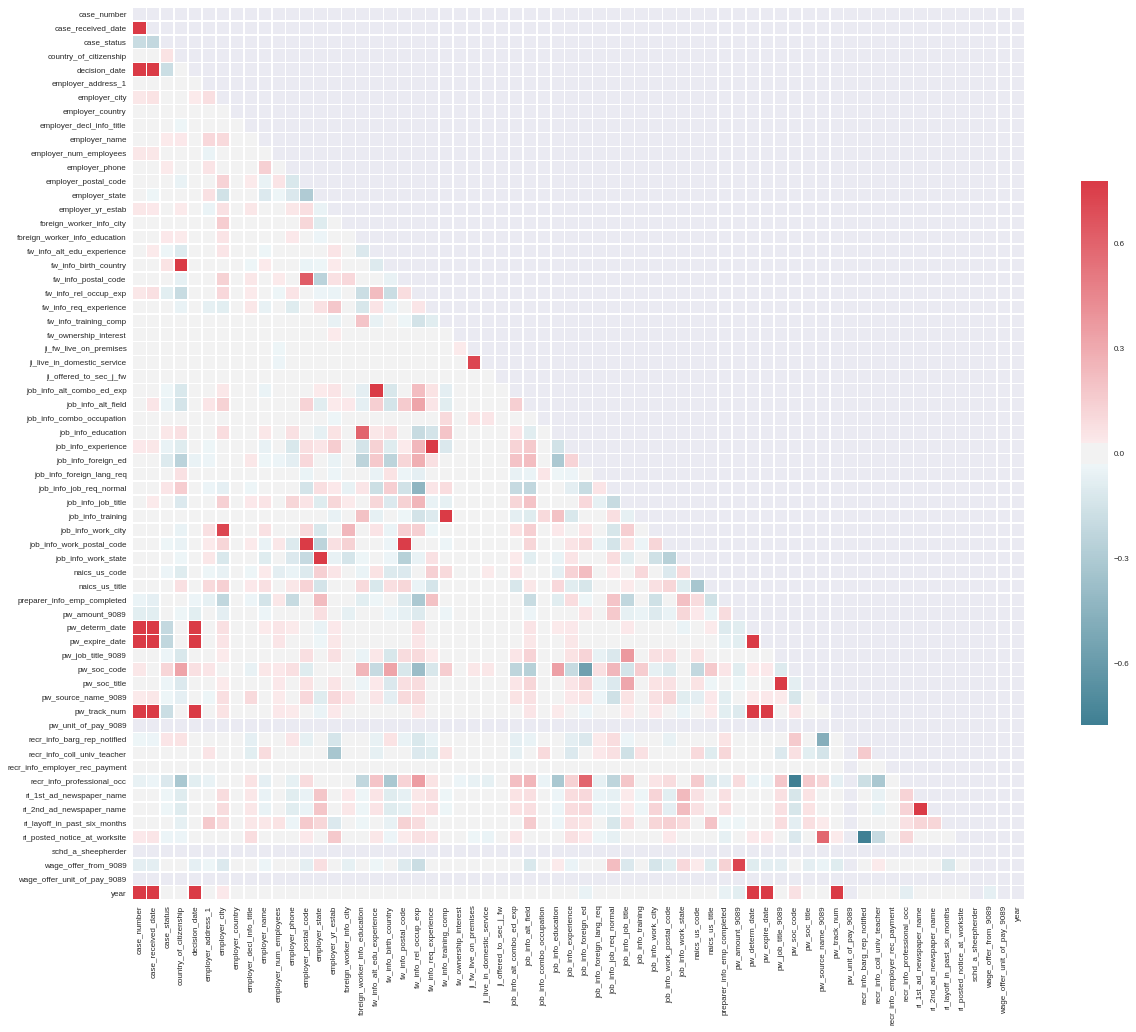

In [28]:
#Visualising correlation using heatmaps
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
#Using heatmap we found that following features had redundant information and hence they were dropped.
final = final.drop(columns=['employer_phone', 'case_number', 'country_of_citizenship','pw_determ_date'
                             , 'pw_expire_date', 'pw_soc_title', 'pw_track_num', 'ri_2nd_ad_newspaper_name', 'year',
                             'job_info_work_postal_code', 'fw_info_postal_code', 'ji_fw_live_on_premises', 'fw_info_alt_edu_experience',
                             'foreign_worker_info_education', 'fw_info_req_experience', 'case_received_date', 'fw_info_training_comp', 'foreign_worker_info_city', 'job_info_work_city', 'job_info_work_state',
                             'ri_posted_notice_at_worksite', 'recr_info_professional_occ', 'employer_address_1', 'employer_decl_info_title',
                             'job_info_job_title', 'pw_soc_code', 'job_info_foreign_ed', 'fw_info_rel_occup_exp', 'employer_yr_estab'])

## Feature Creation

In [0]:
#Creating new feature called 'application_count_per_employer' to avoid columns spelling mistakes & its effects in further tasks. 
final['employer_name'] = final['employer_name'].str.upper()
a = final['employer_name'].tolist()
from collections import Counter 
cnt = Counter(a)
cnt = dict(cnt)
final['employer_name'] = final['employer_name'].map(cnt)
final = final.rename(index=str, columns={"employer_name": "application_count_per_employer"})

In [0]:
 #removing applicants whoes employee number is than two as applicant himself is the employee and employer which is considered as outliers.
  final = final[~(final['employer_num_employees']<2)]

## Feature Selection & Outliers Removal

In [0]:
#Feature selection
final_new = final[['case_status', 'application_count_per_employer', 'employer_num_employees', 'employer_state', 'pw_amount_9089', 'pw_job_title_9089', 
                   'wage_offer_from_9089'
                  ]]
#Removing outliers-whose wage is less than 15000 and more than 500000 as it may affect prediction
final_new = final_new[final_new['wage_offer_from_9089']>15000]
final_new = final_new[final_new['wage_offer_from_9089']<500000]

In [0]:
#Only those applicants are considered  who are certified as wage details of rejected are not predictive of future behaviour of wages
final_new=final_new[(final_new['case_status']=='Certified') | (final_new['case_status']=='Certified-Expired')]

## Feature Transformation (Categorical to Numerical)

In [0]:
#seperating categorical and numerical columns from the final dataframe
final1 = final_new.select_dtypes(include=['object'])
final2 = final_new.select_dtypes(exclude=['object'])

In [0]:
#Target variable
y = final2['wage_offer_from_9089'].values
del final2['wage_offer_from_9089']

In [0]:
#Normalising target variable and numerical features to scale of 0 to 1
y_norm=MinMaxScaler().fit_transform(y.reshape(-1, 1))
norm_final2 = MinMaxScaler().fit_transform(final2)

In [0]:
#Applying Label Encoding to convert categorical to numerical
temp = final1
temp = temp.astype(str)
label_of_final1 = temp.apply(LabelEncoder().fit_transform)

In [0]:
#Applying One-Hot Encoding to binarise the data
enc = OneHotEncoder(handle_unknown='ignore')
onehot = enc.fit_transform(label_of_final1)


## Data Representation(Sparse to CSR)

In [0]:
#Representing sparse data into CSR form and merging numerical and categorical data
norm_final2 = csr_matrix(norm_final2, dtype=np.float64)
merged = sp.hstack([onehot,norm_final2],format='csr')

## Dimensionality Reduction

In [139]:
#Applying Dimesionality Reduction technique Truncated SVD to reduce total columns for training models 
svd = TruncatedSVD(n_components=150, random_state=42)
merged_svd = svd.fit_transform(merged)
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.9159850178128828

## Applying Regression Algorithms

In [0]:
#splitting data into test and train set
X_train, X_test, y_train, y_test = train_test_split(merged_svd, y_norm, test_size=0.1, random_state=42)

In [0]:
#scaling test set back to original
test = []
for i in range(len(y_test)):
  test.append(y_test[i]*(y.max()-y.min())+y.min())

In [0]:
#Applying Linear Regression Model
reglin = linear_model.LinearRegression()
reglin.fit(X_train, y_train)
y_pred = reglin.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_lin=mean_absolute_error(test, pred)
rms1 = sqrt(mean_squared_error(test, pred))
r2_1 = r2_score(test, pred)

In [0]:
#Applying Ridge Regression Model
from sklearn.linear_model import Ridge
regrg = linear_model.Ridge(alpha=1.0)
regrg.fit(X_train, y_train)
y_pred = regrg.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_rg=mean_absolute_error(test, pred)
rms2 = sqrt(mean_squared_error(test, pred))
r2_2 = r2_score(test, pred)

In [0]:
#Applying Lasso Regression Model
from sklearn.linear_model import Lasso
regls = linear_model.Lasso(alpha=1.0)
regls.fit(X_train, y_train)
y_pred = regls.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_ls=mean_absolute_error(test, pred)
rms3 = sqrt(mean_squared_error(test, pred))
r2_3 = r2_score(test, pred)

In [145]:
#Applying Bayesian Ridge Model
from sklearn.linear_model import BayesianRidge
regbr = linear_model.BayesianRidge()
regbr.fit(X_train, y_train)
y_pred = regbr.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_br=mean_absolute_error(test, pred)
rms4 = sqrt(mean_squared_error(test, pred))
r2_4 = r2_score(test, pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#Applying Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regdt = DecisionTreeRegressor(random_state=0)
regdt.fit(X_train, y_train)
y_pred = regdt.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_dt=mean_absolute_error(test, pred)
rms5 = sqrt(mean_squared_error(test, pred))
r2_5 = r2_score(test, pred)

In [147]:
#Applying AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
regab = AdaBoostRegressor(random_state=0)
regab.fit(X_train, y_train)
y_pred = regab.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_ab=mean_absolute_error(test, pred)
rms6 = sqrt(mean_squared_error(test, pred))
r2_6 = r2_score(test, pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#Applying XGB Regressor
import xgboost as xgb
regxg = xgb.XGBRegressor()
regxg.fit(X_train, y_train)
y_pred = regxg.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_xg=mean_absolute_error(test, pred)
rms7 = sqrt(mean_squared_error(test, pred))
r2_7 = r2_score(test, pred)

In [113]:
#Applying SGD Regressor
regsgd = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
regsgd.fit(X_train, y_train)
y_pred = regsgd.predict(X_test)
pred = []
for i in range(len(y_pred)):
  pred.append(y_pred[i]*(y.max()-y.min())+y.min())
mae_sgd=mean_absolute_error(test, pred)
rms8 = sqrt(mean_squared_error(test, pred))
r2_8 = r2_score(test, pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating Regression Models

### MAE

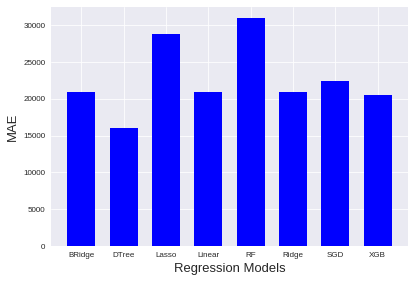

In [148]:
#Plotting MAE with the above methods
j = [mae_lin, mae_rg, mae_ls, mae_br, mae_dt, mae_ab, mae_xg, mae_sgd]
x = ['Linear', 'Ridge', 'Lasso', 'BRidge', 'DTree', 'RF', 'XGB', 'SGD']
width = 1/1.5
plt.bar(x, j, width, color="blue")
plt.xlabel('Regression Models')
plt.ylabel('MAE')
fig = plt.gcf()

### RMSE

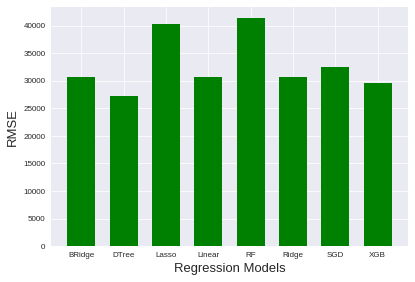

In [149]:
l = [rms1, rms2, rms3, rms4, rms5, rms6, rms7, rms8]
x = ['Linear', 'Ridge', 'Lasso', 'BRidge', 'DTree', 'RF', 'XGB', 'SGD']
width = 1/1.5
plt.bar(x, l, width, color="green")

plt.xlabel('Regression Models')
plt.ylabel('RMSE')

fig = plt.gcf()

### R2-Score

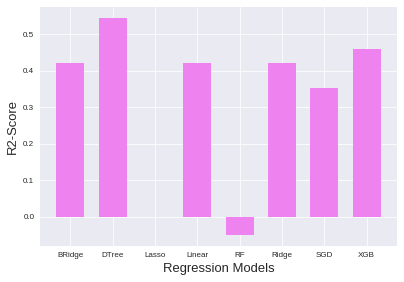

In [150]:
m = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8]
x = ['Linear', 'Ridge', 'Lasso', 'BRidge', 'DTree', 'RF', 'XGB', 'SGD']
width = 1/1.5
plt.bar(x, m, width, color="violet")

plt.xlabel('Regression Models')
plt.ylabel('R2-Score')

fig = plt.gcf()

## 10-Fold Cross Validation

In [232]:
#Applying Linear Regression with 10 fold cross validation
k_fold = KFold(10)
total=0
regr1 = linear_model.LinearRegression()
# regr1.fit(X_train, y_train)
# y_pred1 = regr1.predict(X_test)

for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr1.fit(merged_svd[train], y_norm[train])
    y_pred1 = regr1.predict(merged_svd[test])
    total=total+(mean_absolute_error(y_norm[test],y_pred1)*(y.max()-y.min())+y.min())
    #print(k,mean_absolute_error(y_norm[test],y_pred))
mae1=total/10
print(mae1)

36289.53707365821


In [233]:
#Applying Ridge Regression with 10 fold cross validation
regr2 = linear_model.Ridge(alpha=1.0)
# regr2.fit(X_train, y_train)
# y_pred2 = regr2.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr2.fit(merged_svd[train], y_norm[train])
    y_pred2 = regr2.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred2)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
mae2=total/10
mae2=mae2*(y.max()-y.min())+y.min()
print(mae2)

36311.16100979556


In [234]:
#Applying Lasso Regression with 10 fold cross validation
from sklearn.linear_model import Lasso
reg3 = linear_model.Lasso(alpha=1.0)
k_fold = KFold(10)
total=0
# regr3.fit(X_train, y_train)
# y_pred3 = regr3.predict(X_test)

for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    reg3.fit(merged_svd[train], y_norm[train])
    y_pred = reg3.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
error=total/10
mae3=error*(y.max()-y.min())+y.min()
print(mae3)

44018.78088192834


In [236]:
#Applying Bayesian Ridge with 10 fold cross validation
regr4 = linear_model.BayesianRidge()
# regr4.fit(X_train, y_train)
# y_pred4 = regr4.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr4.fit(merged_svd[train], y_norm[train])
    y_pred = regr4.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
error=total/10
mae4=error*(y.max()-y.min())+y.min()
print(mae4)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36290.76572899407


In [238]:
#Applying Decision Tree Regressor with 10 fold cross validation 
regr5 = DecisionTreeRegressor(random_state=0)
# regr5.fit(X_train, y_train)
# y_pred5 = regr5.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr5.fit(merged_svd[train], y_norm[train])
    y_pred5 = regr5.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred5)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
mae5=total/10
mae5=mae5*(y.max()-y.min())+y.min()
print(mae5)

32390.222404762535


In [0]:
#Applying Adaboost Regressor with 10 fold cross validation
regr6 = AdaBoostRegressor(random_state=0)
# regr6.fit(X_train, y_train)
# y_pred6 = regr6.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr6.fit(merged_svd[train], y_norm[train])
    y_pred = regr6.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
error=total/10
mae6=error*(y.max()-y.min())+y.min()
print(mae6)

In [0]:
#Applying XGB Regressor with 10 fold cross validation
regr7 = xgb.XGBRegressor()
# regr7.fit(X_train, y_train)
# y_pred7 = regr7.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr7.fit(merged_svd[train], y_norm[train])
    y_pred = regr7.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
error=total/10
mae7=error*(y.max()-y.min())+y.min()
print(mae7)

In [235]:
#Applying SGD Regressor with 10 fold cross validation
regr8 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
# regr8.fit(X_train, y_train)
# y_pred8 = regr8.predict(X_test)
k_fold = KFold(10)
total=0
for k, (train, test) in enumerate(k_fold.split(merged_svd, y_norm)):
    regr8.fit(merged_svd[train], y_norm[train])
    y_pred = regr8.predict(merged_svd[test])
    total=total+mean_absolute_error(y_norm[test],y_pred)
    #print(k,mean_absolute_error(y_norm[test],y_pred))
error=total/10
mae8=error*(y.max()-y.min())+y.min()
print(mae8)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37762.13570297464


### 10 Fold CV MAE Score

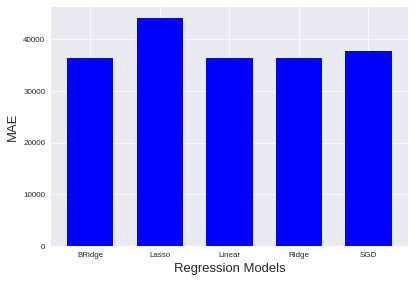

In [237]:
#Plotting MAE with the above methods
j = [mae1, mae2, mae3, mae4, mae8]
x = ['Linear', 'Ridge', 'Lasso', 'BRidge', 'SGD']
width = 1/1.5
plt.bar(x, j, width, color="blue")
plt.xlabel('Regression Models')
plt.ylabel('MAE')
fig = plt.gcf()

## Classification Approach

In [0]:
def set_label2(y):
# set label for all rows
    cls=[0]*len(y)
    for t in range(len(y)):
        if y[t] <= 100000:
            cls[t] = 1
        elif y[t] <= 200000:
            cls[t] = 2
        elif y[t] <= 300000:
            cls[t] = 3
        elif y[t] <= 400000:
            cls[t] = 4
        else:
            cls[t] = 5
    return cls

In [0]:
cls2=set_label2(y)

In [166]:
from collections import Counter
# check every class attribution
a=Counter(cls2)
print(a)

Counter({1: 151265, 2: 111611, 3: 4003, 4: 473, 5: 116})


## Applying Classification Algorithm

In [0]:
from sklearn.model_selection import train_test_split
# split data to train and test
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(merged_svd, cls2, test_size=0.1)

In [0]:
# use knn model to predict
from sklearn import neighbors, datasets
n_neighbors=2
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train_c2,y_train_c2 )
pred_knn=clf.predict(X_test_c2)

In [0]:
# use linearSVC to predict
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train_c2, y_train_c2)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
pred_LSVC=clf.predict(X_test_c2)

In [0]:
# use GaussianNB to predict
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_gnb = gnb.fit(X_train_c2, y_train_c2).predict(X_test_c2)

In [0]:
# use SGD to predict
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train_c2, y_train_c2)
pred_SGD=clf.predict(X_test)

In [0]:
# use RandomForestClassifier to predict
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_c2, y_train_c2)
pred_RFC=clf.predict(X_test_c2)

In [0]:
# use decision tree to predict
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf=clf.fit(X_train_c2, y_train_c2)
pred_DT=clf.predict(X_test_c2)

In [0]:
# change label list to numpy array
from numpy import array
y = array(cls2)

## K-Fold Validation for 6 Models

In [175]:
# K fold validation for KNN
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors, datasets
n_neighbors=2
clf = neighbors.KNeighborsClassifier(n_neighbors)
k_fold = KFold(10,shuffle=True)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    y_pred_KNN = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_KNN,average=None))
    totalacc += accuracy_score(y[test], y_pred_KNN)
print(totalf1/10)
print(totalacc/10)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8926562136255333
0.860966531856395


In [176]:
# K fold valigation for linear SVC
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
k_fold = KFold(10,shuffle=True)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    y_pred_LSVC = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_LSVC,average=None))
    totalacc += accuracy_score(y[test], y_pred_LSVC)
print(totalf1/10)
print(totalacc/10)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7756434156414124
0.7295638883861768


In [203]:
# K fold valigation for Gaussian NB
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
k_fold = KFold(10,shuffle=True)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    y_pred_GNB = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_GNB,average=None))
    totalacc += accuracy_score(y[test], y_pred_GNB)
print(totalf1/10)
print(totalacc/10)

0.5986644119479123
0.4223159357724618


In [204]:
# K fold valigation for SGD
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
k_fold = KFold(10,shuffle=True)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    y_pred_SGD = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_SGD,average=None))
    totalacc += accuracy_score(y[test], y_pred_SGD)
print(totalf1/10)
print(totalacc/10)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7678512573397744
0.7223705005611447


In [205]:
# K fold valigation for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=10)
k_fold = KFold(10,shuffle=True)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    y_pred_RFC = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_RFC,average=None))
    totalacc += accuracy_score(y[test], y_pred_RFC)
print(totalf1/10)
print(totalacc/10)

0.821448800538793
0.7848789420397934


In [206]:
# K fold valigation for Decision tree
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
k_fold = KFold(10,shuffle=True)
clf = DecisionTreeClassifier(random_state=0)
totalf1 = 0
totalacc = 0
for (train, test) in (k_fold.split(merged_svd)):
    clf.fit(merged_svd[train], y[train])
    y_pred_DT = clf.predict(merged_svd[test])
    totalf1 += max(f1_score(y[test], y_pred_DT,average=None))
    totalacc += accuracy_score(y[test], y_pred_DT)
print(totalf1/10)
print(totalacc/10)

0.8184572863103862
0.78055692384286


## Prediction F1 Score without Validation

In [0]:
from sklearn.metrics import f1_score
fknn=f1_score(y_test_c2, pred_knn,average=None)

In [193]:
from sklearn.metrics import f1_score
flvc=f1_score(y_test_c2, pred_LSVC,average=None) 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
flvc

In [0]:
from sklearn.metrics import f1_score
fgnb=f1_score(y_test_c2, pred_gnb,average=None) 

In [195]:
from sklearn.metrics import f1_score
fsgd=f1_score(y_test_c2, pred_SGD,average=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import f1_score
frfc=f1_score(y_test_c2, pred_RFC,average=None)

In [0]:
from sklearn.metrics import f1_score
fdt=f1_score(y_test_c2, pred_DT,average=None)

## Prediction accuracy score without validation

In [0]:
from sklearn.metrics import accuracy_score
aknn=accuracy_score(y_test_c2, pred_knn)

In [0]:
from sklearn.metrics import accuracy_score
alsvc=accuracy_score(y_test_c2, pred_LSVC)

In [0]:
from sklearn.metrics import accuracy_score
agnb=accuracy_score(y_test_c2, pred_gnb)

In [0]:
from sklearn.metrics import accuracy_score
asgd=accuracy_score(y_test_c2, pred_SGD)

In [0]:
from sklearn.metrics import accuracy_score
arfc=accuracy_score(y_test_c2, pred_RFC)

In [0]:
from sklearn.metrics import accuracy_score
adt=accuracy_score(y_test_c2, pred_DT)

## Comparison of Accuracies across models 

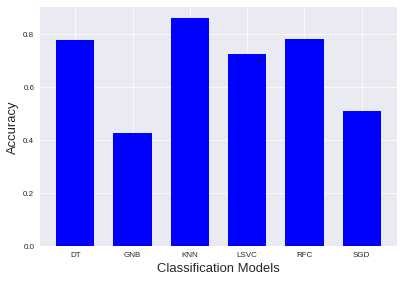

In [189]:
#Plotting acuuracy 
jc = [aknn, alsvc, agnb, asgd, arfc, adt]
x = ['KNN', 'LSVC', 'GNB', 'SGD', 'RFC', 'DT']
width = 1/1.5
plt.bar(x, jc, width, color="blue")
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
fig = plt.gcf()

## Comparison of F1 Score across models

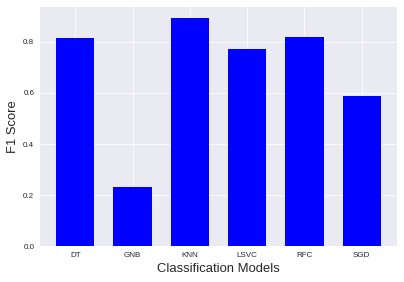

In [202]:
#Plotting f1 
jf = [fknn[0], flvc[0], fgnb[0], fsgd[0], frfc[0], fdt[0]]
x = ['KNN', 'LSVC', 'GNB', 'SGD', 'RFC', 'DT']
width = 1/1.5
plt.bar(x, jf, width, color="blue")
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
fig = plt.gcf()